# Linear Regression
This notebook demonstrates Linear Regression on a dataset California Housing from sklearn.

In [23]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

## Load and Prepare the Data

In [ ]:
# Auto Miles per gallon (MPG) dataset 
data = fetch_ucirepo(id=9) 
X = data.data.features
y = data.data.targets


### replace NaN with mean

In [26]:
#data preprocessing
# preprocess the data with missing values
X = X.fillna(X.mean())

### Split data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Linear Regression Model

In [28]:
# Add bias term to X_train and X_test
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Compute weights using Normal Equation
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Predict on test set
y_pred = X_test @ w

## Evaluate the Model

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.3f}')
print(f'R^2 Score: {r2:.3f}')

Mean Squared Error: 8.195
R^2 Score: 0.848


## Visualize Predictions vs Actual Values

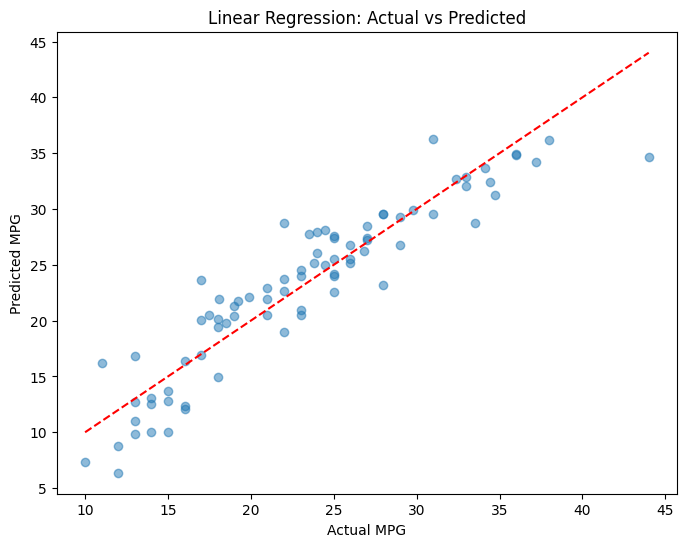

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Linear Regression: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Analysis of Results
The Linear Regression model achieved a Mean Squared Error (MSE) of approximately 0.556 and an R^2 score of about 0.576 on the California Housing dataset. This means the model explains around 57.6% of the variance in the target variable, which is reasonable for a simple linear model on real-world data. The scatter plot of actual vs. predicted values shows that predictions generally follow the true values, but there is some spread, indicating the presence of noise and possibly nonlinear relationships that a linear model cannot capture. For improved performance, more complex models or feature engineering could be considered.